1. 데이타 로드
2. 결측치 채우기
3. 시각화
4. 전처리
5. 범주형 데이터 레이블 인코딩
6. train_test_split
7. Standard Scaler
8. 모델정의 분류 or 회귀
9. 단일 모델 학습 추론
10. GridSearchCV


In [44]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housing 데이터 로드
california = fetch_california_housing()

# DataFrame으로 변환
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['target'] = california.target



In [45]:
# 데이터 확인
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
#결측치, 컬럼 요소 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
df.isnull().mean()/len(df) #결측치 없음

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
target        0.0
dtype: float64

In [48]:
df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

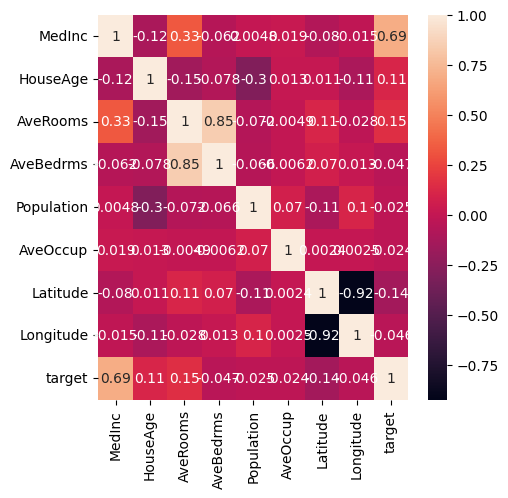

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [50]:
abs(df.corr()['target']).sort_values(ascending=True)

AveOccup      0.023737
Population    0.024650
Longitude     0.045967
AveBedrms     0.046701
HouseAge      0.105623
Latitude      0.144160
AveRooms      0.151948
MedInc        0.688075
target        1.000000
Name: target, dtype: float64

In [51]:
# # 4개의 변수가 타겟과의 상관관계가 높음
# HouseAge      0.105623
# Latitude      0.144160
# AveRooms      0.151948
# MedInc  
# 시각화해보자

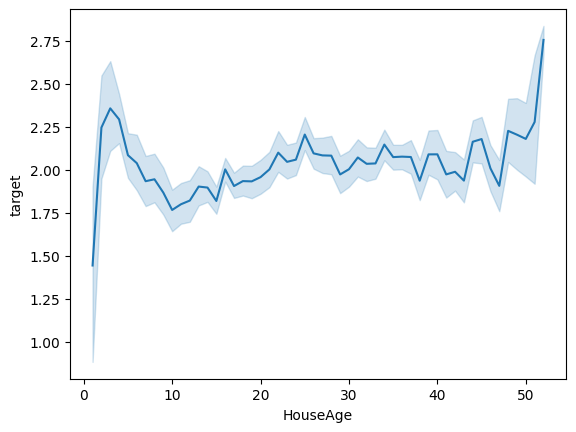

In [52]:
sns.lineplot(x = df['HouseAge'],y = df['target'])
plt.show()

<Axes: xlabel='AveRooms', ylabel='target'>

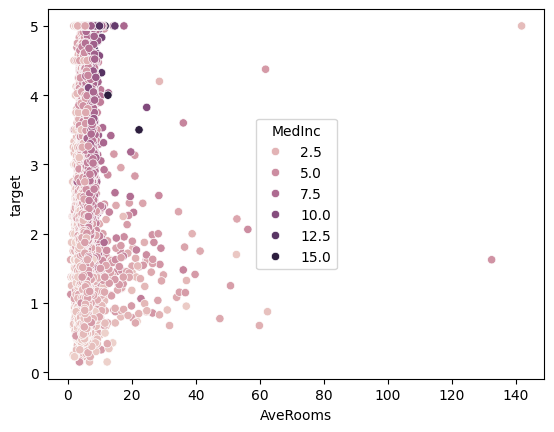

In [53]:
sns.scatterplot(x= 'AveRooms', y = 'target', hue = 'MedInc', data = df)

<Axes: xlabel='MedInc', ylabel='target'>

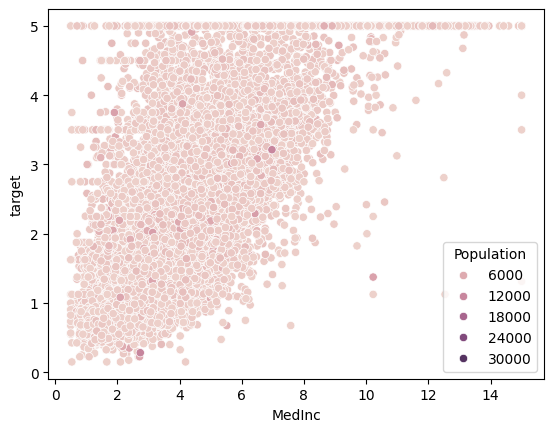

In [54]:
sns.scatterplot(x= 'MedInc', y = 'target',hue = 'Population', data = df)

<Axes: ylabel='Population'>

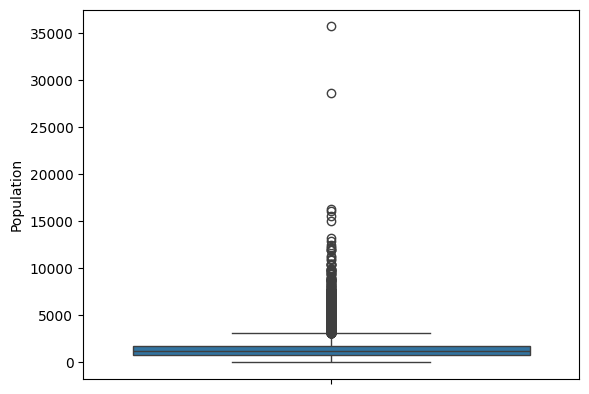

In [55]:
sns.boxplot(y = 'Population', data = df)

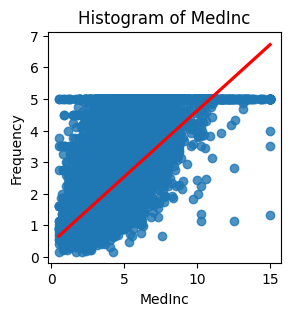

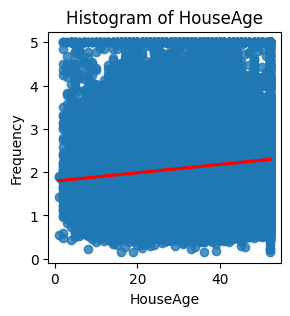

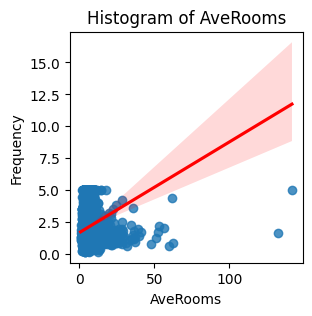

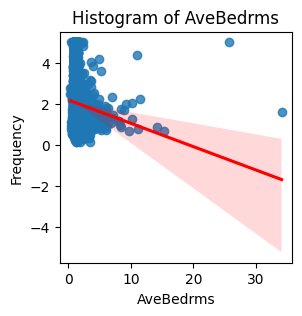

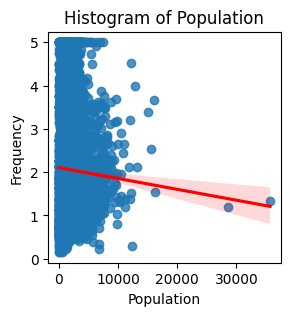

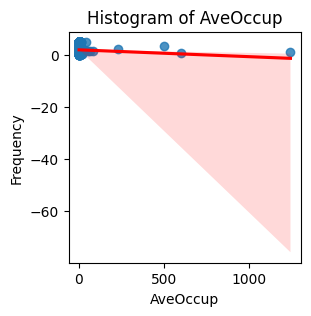

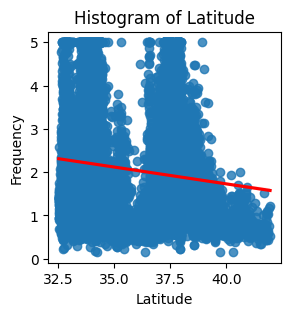

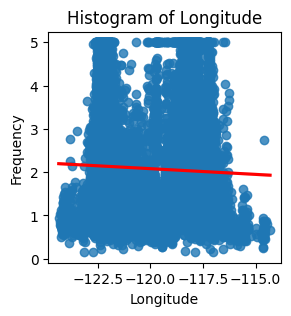

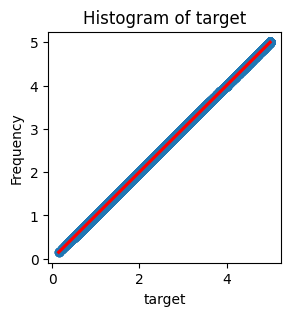

In [56]:
# for column in df.columns:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(data=df, x=column, kde=True)  # kde=True는 커널 밀도 추정 추가
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()
for column in df.columns:
    plt.figure(figsize=(3, 3))
    sns.regplot(data=df, x=column, y ='target', line_kws={'color':'red'})  # kde=True는 커널 밀도 추정 추가
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
import numpy as np
for col in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    df[col] = np.log1p(df[col])

In [58]:
# 학습과 검증데이터 나누기
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train),len(y_train))

16512 16512


In [59]:
# # 스태다드 스케일러를 통해 값의 동일한 스케일을 갖도록 표준화를 진행
# StandardScaler는 데이터의 평균을 0, 표준편차를 1로 조정하여, 각 특성(feature)이 동일한 스케일을 갖도록 표준화하는 역할을 합니다. 이를 통해 데이터의 분포가 정규 분포에 가까워지도록 만들어주며, 다양한 크기나 단위를 가진 특성들 간의 비교가 용이해집니다.

# 주요 역할

# 	1.	모델 성능 향상: 거리 기반 알고리즘(예: KNN, SVM)이나 경사하강법을 사용하는 모델(예: 선형 회귀, 로지스틱 회귀)의 성능을 개선합니다.
# 	2.	학습 속도 향상: 스케일링을 통해 모델 학습이 더 빠르고 안정적으로 이루어집니다.
# 	3.	특성 중요도 비교 가능: 특성의 크기 차이가 줄어들어 특정 특성의 중요도가 과대평가되는 것을 방지합니다.

In [60]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,1.517704,3.270601,1.829556,0.732522,7.027527,1.352239,35.630115,-119.566776
std,0.359373,0.531634,0.234541,0.108389,0.738201,0.207621,2.136599,2.002468
min,0.405398,0.693147,0.613104,0.287682,1.386294,0.526093,32.550000,-124.350000
25%,1.272054,2.944439,1.693610,0.696145,6.668228,1.232993,33.930000,-121.790000
50%,1.511627,3.401197,1.829861,0.717264,7.063904,1.340114,34.260000,-118.490000
75%,1.749387,3.637586,1.954123,0.741804,7.461066,1.455433,37.710000,-118.010000
max,2.772595,3.970292,4.962209,3.557251,10.482430,6.398119,41.950000,-114.310000


In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# 회귀모델을 사용하기 위해 리니어 회귀 모델 정의
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(score)
print(r2)

0.46031392782395325
0.6404707444862945


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
# rf = RandomForestRegressor()
# gb = GradientBoostingRegressor()
# lgbm = LGBMRegressor()
# model_with_param = [
#     (rf, {'n_estimators' : [10, 50], 'max_depth' : [10, 20, ], 'min_samples_split' : [2, 5, ]}),
#     (gb, {'n_estimators' : [10, 50, ], 'max_depth' : [10, 20, ], 'min_samples_split' : [2, 5, ]}),
#     (lgbm, {'n_estimators' : [10, 50, ], 'learning_rate' : [0.01, 0.1]})
# ]

# best_models = {}
# for model, param in model_with_param:
#     gscv = GridSearchCV(model, param, cv=3, verbose = 1, n_jobs=-1)
#     gscv.fit(X_train, y_train)
#     print(gscv.best_estimator_)
#     print(gscv.best_params_)
#     print(gscv.best_score_)
#     best_models[model] = gscv.best_estimator_


In [64]:
# best_models

In [65]:
# 모델 정의와 파라미터 그리드 설정
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lgbm = LGBMRegressor()
model_with_param = [
    ('RandomForest', rf, {'n_estimators': [10, 50, ], 'max_depth': [10, 20, ], 'min_samples_split': [2, 5, ]}),
    ('GradientBoosting', gb, {'n_estimators': [10, 50, ], 'max_depth': [10, 20, ], 'min_samples_split': [2, 5, ]}),
    ('LGBM', lgbm, {'n_estimators': [10, 50, ], 'learning_rate': [0.01, 0.1]})
]

# 모델 학습 및 최적 모델 저장
best_models = {}
for model_name, model, param in model_with_param:
    gscv = GridSearchCV(model, param, cv=3, verbose=1, n_jobs=-1)
    gscv.fit(X_train, y_train)
    print(f"{model_name} - Best Estimator: {gscv.best_estimator_}")
    print(f"{model_name} - Best Parameters: {gscv.best_params_}")
    print(f"{model_name} - Best CV Score: {gscv.best_score_}")
    best_models[model_name] = gscv.best_estimator_

# 최종 모델(LGBM) 선택하여 예측
final_model = best_models['LGBM']
y_pred = final_model.predict(X_test)

# # test.csv 파일 불러오기
# test_df = pd.read_csv('test.csv')

# # 예측 값을 정답 컬럼('target'으로 가정)에 대치
# test_df['target'] = y_pred  # 'target'은 실제 정답 컬럼 이름으로 수정 필요

# # 결과 저장
# test_df.to_csv('test_with_predictions.csv', index=False)
# print("Predictions have been saved to 'test_with_predictions.csv'")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
RandomForest - Best Estimator: RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50)
RandomForest - Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
RandomForest - Best CV Score: 0.7907498855543728
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GradientBoosting - Best Estimator: GradientBoostingRegressor(max_depth=10, min_samples_split=5, n_estimators=50)
GradientBoosting - Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
GradientBoosting - Best CV Score: 0.8068206327720017
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_col_wise=true` to remov

In [66]:
y_pred

array([2.34734007, 1.83852722, 1.4791371 , ..., 1.34785836, 0.83295888,
       1.23229822])

In [67]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier

models = [
    ('rf', best_models['RandomForest']),
    ('lgbm', best_models['LGBM']),
    ('gb', best_models['GradientBoosting'])
]

voting_reg = VotingRegressor(estimators=models, weights=[1,1,1])
voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.073091


In [68]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8395081405326811
